# Zadaci – Python osnove (NumPy, matplotlib)

U nastavku se nalazi 5 zadataka. Svaki zadatak sadrži opis i podkorake u Markdown ćelijama, kao i prazne kod ćelije u koje treba upisati rešenje.

## Zadatak 1: NumPy – reshape, view i modifikacije

Dat je jednodimenzionalni NumPy niz koji sadrži uzastopne celobrojne vrednosti.

**Podzadaci:**
1. Napraviti NumPy niz `x` koji sadrži vrednosti od 1 do 12  
2. Preoblikovati niz u matricu dimenzija `(3, 4)` i sačuvati je u promenljivoj `X`  
3. Izmeniti vrednost elementa u prvom redu i prvoj koloni matrice `X`  
4. Proveriti da li je došlo do promene u originalnom nizu `x`  
5. Proveriti i prikazati broj dimenzija i tip podataka u `X` promenljivoj

In [33]:
import numpy as np
x = np.arange(1,13)

In [34]:
X = x.reshape(3,4)

In [35]:
print(x, X)

[ 1  2  3  4  5  6  7  8  9 10 11 12] [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [36]:
X[0,0] = 99
print(X)

[[99  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [37]:
X.shape , type(X)

((3, 4), numpy.ndarray)

In [38]:
X, x

(array([[99,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]),
 array([99,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

In [39]:
%whos

Variable   Type         Data/Info
---------------------------------
X          ndarray      3x4: 12 elems, type `int64`, 96 bytes
X_new      ndarray      100x5: 500 elems, type `float64`, 4000 bytes
copy       module       <module 'copy' from '/hom<...>/lib/python3.11/copy.py'>
gen        Generator    Generator(PCG64)
np         module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
x          ndarray      12: 12 elems, type `int64`, 96 bytes


In [41]:
import copy

X_new = copy.deepcopy(X)
X_new[0,0] = 123
print(X_new, X, x)

[[123   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]] [[99  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] [99  2  3  4  5  6  7  8  9 10 11 12]


## Zadatak 2: NumPy – slučajni brojevi i statistika

Rad sa generatorom slučajnih brojeva i statističkim operacijama.

**Podzadaci:**
1. Inicijalizovati generator slučajnih brojeva pomoću  
   `np.random.default_rng(2025)`  
2. Generisati matricu `X` dimenzija `(100, 5)` iz standardne normalne raspodele  
3. Izračunati srednju vrednost i standardnu devijaciju **po kolonama**  
4. Izračunati ukupnu varijansu cele matrice  
5. Uporediti ukupnu varijansu sa prosečnom varijansom po kolonama

In [44]:
gen = np.random.default_rng(2025)


In [45]:
X = gen.normal(size=(100, 5))

In [72]:
mean_cols = X.mean(axis=0)
std_cols = X.std(axis =0)
mean_cols, std_cols

(array([-0.04002851,  0.03674091, -0.14693154,  0.14351709, -0.06568197]),
 array([1.0206377 , 0.88550463, 1.08774208, 1.04617892, 1.03712169]))

In [73]:
var_cols = X.var(axis = 0)

In [75]:
var_cols.mean()

np.float64(1.035822865704377)

In [22]:
X.var()

np.float64(1.0358948469281852)

## Zadatak 3: NumPy – vektorizacija i korelacija

**Podzadaci:**
1. Generisati vektor `x` dužine 200 iz raspodele `N(0, 1)` (korisiti isti generator slučajnih brojeva iz prethodnog zadatka) 
2. Generisati šum `ε ~ N(0, 0.5)` i konstruisati vektor  
   `y = 3x + ε`  
3. Izračunati korelaciju između vektora `x` i `y` bez korišćenja petlji  
4. Izračunati srednju vrednost i standardnu devijaciju za oba vektora  
5. Prikazati sve dobijene vrednosti 

In [96]:
x = gen.normal(loc = 0, scale=1, size = 200)

In [97]:
E = gen.normal(loc = 0, scale=0.5, size = 200)

In [98]:
y = 3* x + E

In [99]:
cor = np.corrcoef(x,y)

In [100]:
cor

array([[1.        , 0.98483748],
       [0.98483748, 1.        ]])

In [101]:
x.mean(), x.std()

(np.float64(-0.09959520765059254), np.float64(0.8868441143423017))

In [102]:
y.mean(), y.std()

(np.float64(-0.2884671855160205), np.float64(2.7312623572314303))

In [107]:
s = gen.normal(0,1,200)
print(s)

[-0.1008791   1.06675263  0.64590729  0.82515441  1.08130495  0.19473047
 -0.29599334  1.51249275 -1.05583648  0.52063364  0.53424433  0.01241288
  2.78806261  0.32276887  2.65855026  1.08727507  0.91624779 -1.24125718
 -0.93200609  0.94424225 -0.48652474 -2.25916534  1.1124439  -1.01147654
 -0.46004024 -0.20980653 -0.41618045 -0.22958203  1.78974434 -1.43496628
 -0.43644807 -0.634568    0.71050835 -0.65218991 -0.29558023 -1.75150312
  0.2731915   0.20020089  0.75525489 -0.09718371 -0.65298594 -0.79549061
  0.47192756 -0.11887583  2.29229475 -1.68408315 -0.09469369 -0.09961578
  0.72682347  0.8240339  -0.00617901 -0.17797084 -0.81689804  1.07697575
  0.7860756  -0.93118839  0.0557862  -0.04861448  0.61797213  0.26245488
  0.00848011 -0.14229587 -0.39059673  0.59625145 -1.42268184 -0.63169405
 -1.14825129 -0.44135546  1.93985125  0.64463958  0.32947314 -1.21320017
 -0.94983006 -0.95617416  0.53871463 -0.49226827 -0.21726373 -1.88545457
  0.11737609  0.58838936 -0.1647424   1.25257589 -0

In [108]:
s = gen.normal(loc=0, scale=1, size=200)
print(s)

[ 0.2299559   0.1717961   0.6900564   0.15905286  1.30176134  0.64608029
  0.06124598 -0.14533104 -1.49921429  2.00052529  1.27380156 -0.9795593
  2.05350948 -0.44127718 -0.96509447  1.36310942  0.98367496 -0.36378408
  0.80110684  1.03497407 -0.88570289 -1.37581238 -0.11007663  0.61668708
 -0.28637257  1.38322778 -0.39939639  0.98989208 -0.10469317 -0.85536742
  1.23896324  1.39053246  0.01742051 -0.85103456  2.27610506  0.07830477
  0.40954457  0.64959204  3.05796377 -0.62031637 -0.33349463  0.29514105
 -1.07979668 -1.39987076 -0.115385   -1.12750056 -1.82392655  0.86317239
  1.23783947 -0.70703112 -0.11856405 -1.42418131  0.20919162 -1.37571123
 -0.38184712 -0.13397802 -1.32567217 -0.29115028  1.43909828  0.0815318
 -1.43431972  1.95828063  0.12912384 -2.34106344 -1.80540909  1.05023965
  0.79804179 -0.07347366  1.07370281 -1.45115552  0.00778088 -0.36859143
  0.36707385 -1.04349027  0.97318619 -0.82662662 -1.79022881  0.359078
  1.75067685 -0.97918516 -1.23720068 -0.14938591 -0.936

In [109]:
s = gen.normal(size=200, loc = 0, scale =1)
print(s)

[ 0.48335063  1.13837908  1.752803   -0.09952145  0.25301085  0.10954706
 -1.04187304 -0.41863108  0.35226911  0.81827327 -0.73308228  0.69760878
 -0.23045799  0.25169841 -0.61536086  0.5105847   0.35213756  1.51278432
  1.84570869 -0.97038392 -0.79423164 -2.09124906  0.80485033  0.44274589
  1.23269049 -2.45543783  0.13730242 -0.35147724  0.61171877  0.31616391
  1.17344989 -1.40604305 -0.18341309 -0.16029417  0.92209715 -0.07562165
  1.30919667  0.10662853  0.23189008  0.81339909 -0.37683175  0.4648535
 -0.44534035 -0.22772352 -1.83794899  0.17046784 -0.32857081  0.86216013
  1.66043447  0.20327574  0.55669681 -0.24918018 -0.2793145  -0.26375163
 -0.04156789  0.55134164  1.72891959  1.12204563  0.0942388   0.22512392
 -2.13118353  1.63873552  2.11758752  0.19844703  0.18097466 -1.90912532
 -0.37698516 -0.8439935  -0.82998385 -0.46135189 -0.07869045  1.04912275
  0.78789891 -0.09632128 -0.40261929 -0.40005159  0.75513834 -0.1888075
 -1.69553302 -2.30114743  0.47042083  0.41593735 -0.7

In [110]:
s = gen.normal(0, 1, size=200)
print(s)

[-1.55271216e+00 -8.98080236e-01 -4.31584865e-01  6.69764902e-01
  4.79654536e-01 -7.70244688e-01 -3.39642978e-01 -3.66596740e-01
  4.96805663e-01 -9.94839181e-02 -6.08641654e-01 -3.81108130e-01
  3.81403240e+00 -6.96097482e-01  4.22364000e-01 -4.87845785e-01
  9.57055654e-01  3.68148203e-01 -2.70535466e-01  1.13822529e+00
 -7.49493730e-01 -2.69668264e-01  1.86350218e+00 -9.59560068e-01
  6.44101348e-01 -1.11842805e+00  7.76020068e-01  2.74771276e-01
 -5.82645406e-01 -5.55356650e-01 -1.22946389e+00 -7.99594230e-01
  9.76200509e-01 -5.42059426e-01  3.20576305e-01 -6.43175905e-01
 -9.39475419e-01 -8.88826862e-01  8.28325053e-01  8.58000062e-01
 -1.02300745e+00  6.99554531e-02 -1.69547825e+00  1.11906098e+00
  8.00770099e-01 -4.36921538e-01  1.88230823e+00 -1.27196649e+00
 -6.78325591e-01  5.28006562e-01 -2.44402990e+00 -3.17109306e-01
 -1.12579444e+00  4.75247888e-01 -3.88270504e-01 -4.79329407e-01
 -1.12740317e+00 -2.35416633e+00  4.87037124e-01  1.89875403e+00
 -2.62271273e+00  2.11835

In [111]:
s = gen.normal(loc=0, 1, size=200)
print(s)

SyntaxError: positional argument follows keyword argument (3781797540.py, line 1)

## Zadatak 4: Matplotlib – više subplotova u jednom redu (1×3)

Cilj zadatka je upoznavanje sa `matplotlib` funkcijom `subplots()`.

**Podzadaci:**
1. Generisati vektor `x` sa 100 slučajnih realnih vrednosti  
2. Napraviti jednu figuru sa tri subplota u jednom redu (1×3)
3. Na prvom subplotu prikazati linijski graf vektora `x`  
4. Na drugom subplotu prikazati histogram vektora `x`  
5. Na trećem subplotu prikazati scatter graf `(x, x²)`  
6. Svakom subplotu dodati odgovarajući naslov

In [68]:
x = np.random.random(100)

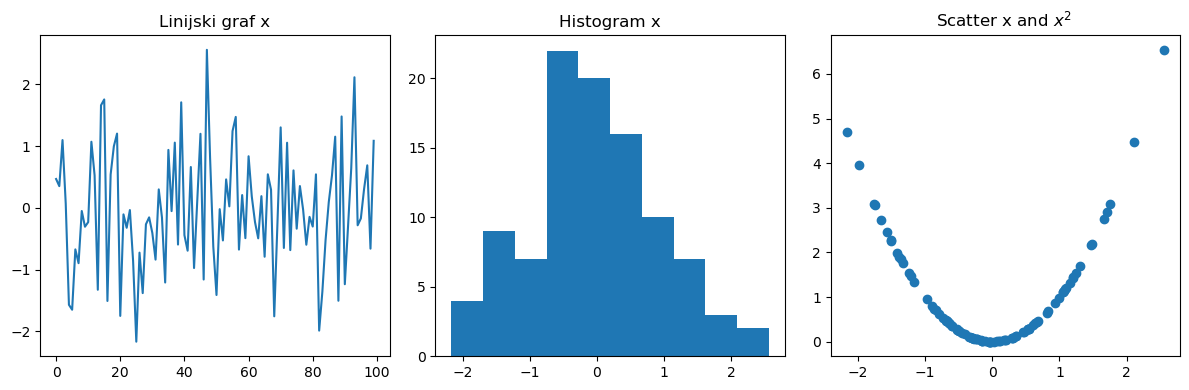

In [140]:
import matplotlib.pyplot as plt
x = gen.normal(size=100)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
ax1.plot(x)
ax1.set_title("Linijski graf x")
ax2.hist(x)
ax2.set_title("Histogram x")
ax3.scatter(x, x**2)
ax3.set_title("Scatter x and $x^2$ ")
plt.tight_layout()
plt.show()

## Zadatak 5: Matplotlib – mreža subplotova (2×2)

U ovom zadatku koristi se složeniji raspored grafika.

**Podzadaci:**
1. Napraviti figuru sa mrežom **2×2 subplotova**  
2. Generisati dva vektora `x` i `y` iste dužine sa slučajnim vrednostima  
3. Prikazati sledeće grafike:
   - (0,0): scatter graf `x` vs `y`  
   - (0,1): scatter graf `x` vs `y` sa drugim markerom  
   - (1,0): linijski graf vektora `x`  
   - (1,1): histogram vektora `y`  
4. Podesiti naslov svakog od zadatih grafika  
5. Podesiti veličinu figure tako da svi grafici budu jasno vidljivi
6. Sačuvati grafik kao .png fajl

In [131]:
x = gen.normal(size=100)
y = gen.normal(size=100)

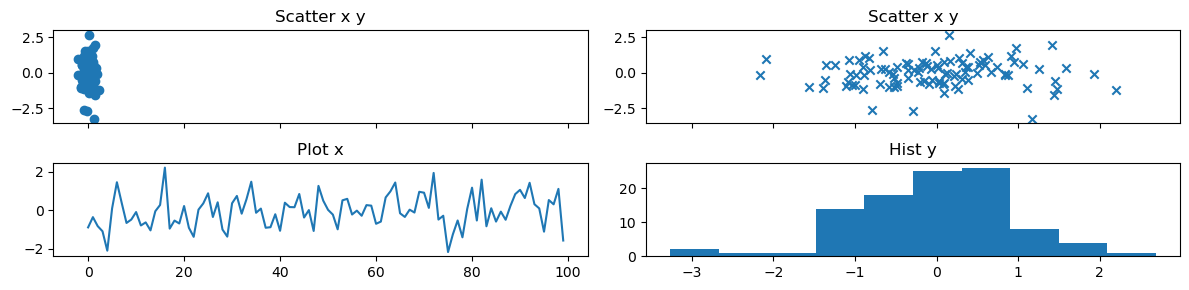

In [138]:
fig, ax = plt.subplots(2,2,figsize=(12,3), sharex = 'col')
ax[0,0].scatter(x, y)
ax[0,0].set_title("Scatter x y")
ax[0,1].scatter(x, y, marker = "x")
ax[0,1].set_title("Scatter x y")
ax[1,0].plot(x)
ax[1,0].set_title("Plot x")
ax[1,1].hist(y)
ax[1,1].set_title("Hist y")
fig.savefig("subplots_101.png", dpi = 300)
plt.tight_layout()
plt.show()
